In [2]:
### Block 1: Imports and Configuration
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, MobileNetV3Large
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Setup Complete!")

Setup Complete!


In [3]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tf-keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
### Block 2: Dataset Paths and Label Extraction
data_dir = "E:\Major project 7th sem\classification\modified AID 8th sem"
img_size = (224, 224)
num_classes = 30  # Adjust based on your dataset

# Extract file paths and labels
image_paths = []
labels = []
for label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, label)
    if os.path.isdir(class_dir):
        for img in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img))
            labels.append(label)

# Create DataFrame
data = pd.DataFrame({"image_path": image_paths, "label": labels})

# Encode labels
data["label"] = data["label"].astype("category").cat.codes
print(f"Dataset contains {len(data)} images.")

Dataset contains 3542 images.


In [5]:
import pandas as pd

def trim(df, max_samples, min_samples, column):
    df = df.copy()  # Create a copy of the DataFrame
    groups = df.groupby(column)  # Group by class labels
    trimmed_df = pd.DataFrame(columns=df.columns)  # Empty DataFrame to store results

    for label, group in groups:
        count = len(group)

        if count > max_samples:  
            # Trim class to 300 images
            sampled_group = group.sample(n=max_samples, random_state=123, axis=0)
        elif count >= min_samples:  
            # Keep the class if it has at least min_samples
            sampled_group = group
        else:
            continue  # Skip classes with too few samples

        trimmed_df = pd.concat([trimmed_df, sampled_group], axis=0)

    print(f'After trimming, each class has a maximum of {max_samples} and a minimum of {min_samples} images.')
    return trimmed_df

# Parameters
max_samples = 300  # Trim each class to 300 images
min_samples = 100  # Ignore classes with fewer than 100 images
column = 'labels'  # Column representing class labels

# Apply trimming
train_df = trim(train_df, max_samples, min_samples, column)


NameError: name 'train_df' is not defined

In [6]:
### Block 3: Train-Test Split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, stratify=train_data["label"], random_state=42)

print(f"Training Samples: {len(train_data)}")
print(f"Validation Samples: {len(val_data)}")
print(f"Testing Samples: {len(test_data)}")

Training Samples: 2266
Validation Samples: 567
Testing Samples: 709


In [7]:
sdir=r'E:\Major project 7th sem\classification\modified AID 8th sem'
classlist=sorted(os.listdir(sdir))
print (classlist)
filepaths = []
labels=[]
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=sorted(os.listdir(classpath))
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
train_df, dummy_df=train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df= train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
# get the number of classes and the images count for each class in train_df
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
# lets get the average height and width of a sample of the train images
ht=0
wt=0
# select 100 random samples of train_df
train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

['BareLand', 'Beach', 'Bridge', 'Farmland', 'Parking', 'RailwayStation', 'River', 'SparseResidential', 'Stadium', 'Urban area(commercial)']
train_df lenght:  3187   test_df length:  178   valid_df length:  177
The number of classes in the dataset is:  10
            CLASS               IMAGE COUNT 
           BareLand                 302     
            Beach                   360     
            Bridge                  324     
           Farmland                 333     
           Parking                  351     
        RailwayStation              277     
            River                   369     
      SparseResidential             270     
           Stadium                  286     
    Urban area(commercial)          315     
River  has the most images=  369   SparseResidential  has the least images=  270
average height=  591  average width=  593 aspect ratio=  0.9962105901374293


In [8]:
working_dir=r'./'
img_size=(224,224)
batch_size=16 # We will use and EfficientetB3 model, with image size of (200, 250) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2 )
t_and_v_gen=ImageDataGenerator()
msg='{0:70s} for train generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='{0:70s} for valid generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
msg='{0:70s} for test generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

Found 3187 validated image filenames belonging to 10 classes.          for train generator 
Found 177 validated image filenames belonging to 10 classes.           for valid generator 
Found 178 validated image filenames belonging to 10 classes.           for test generator 
test batch size:  2   test steps:  89  number of classes :  10


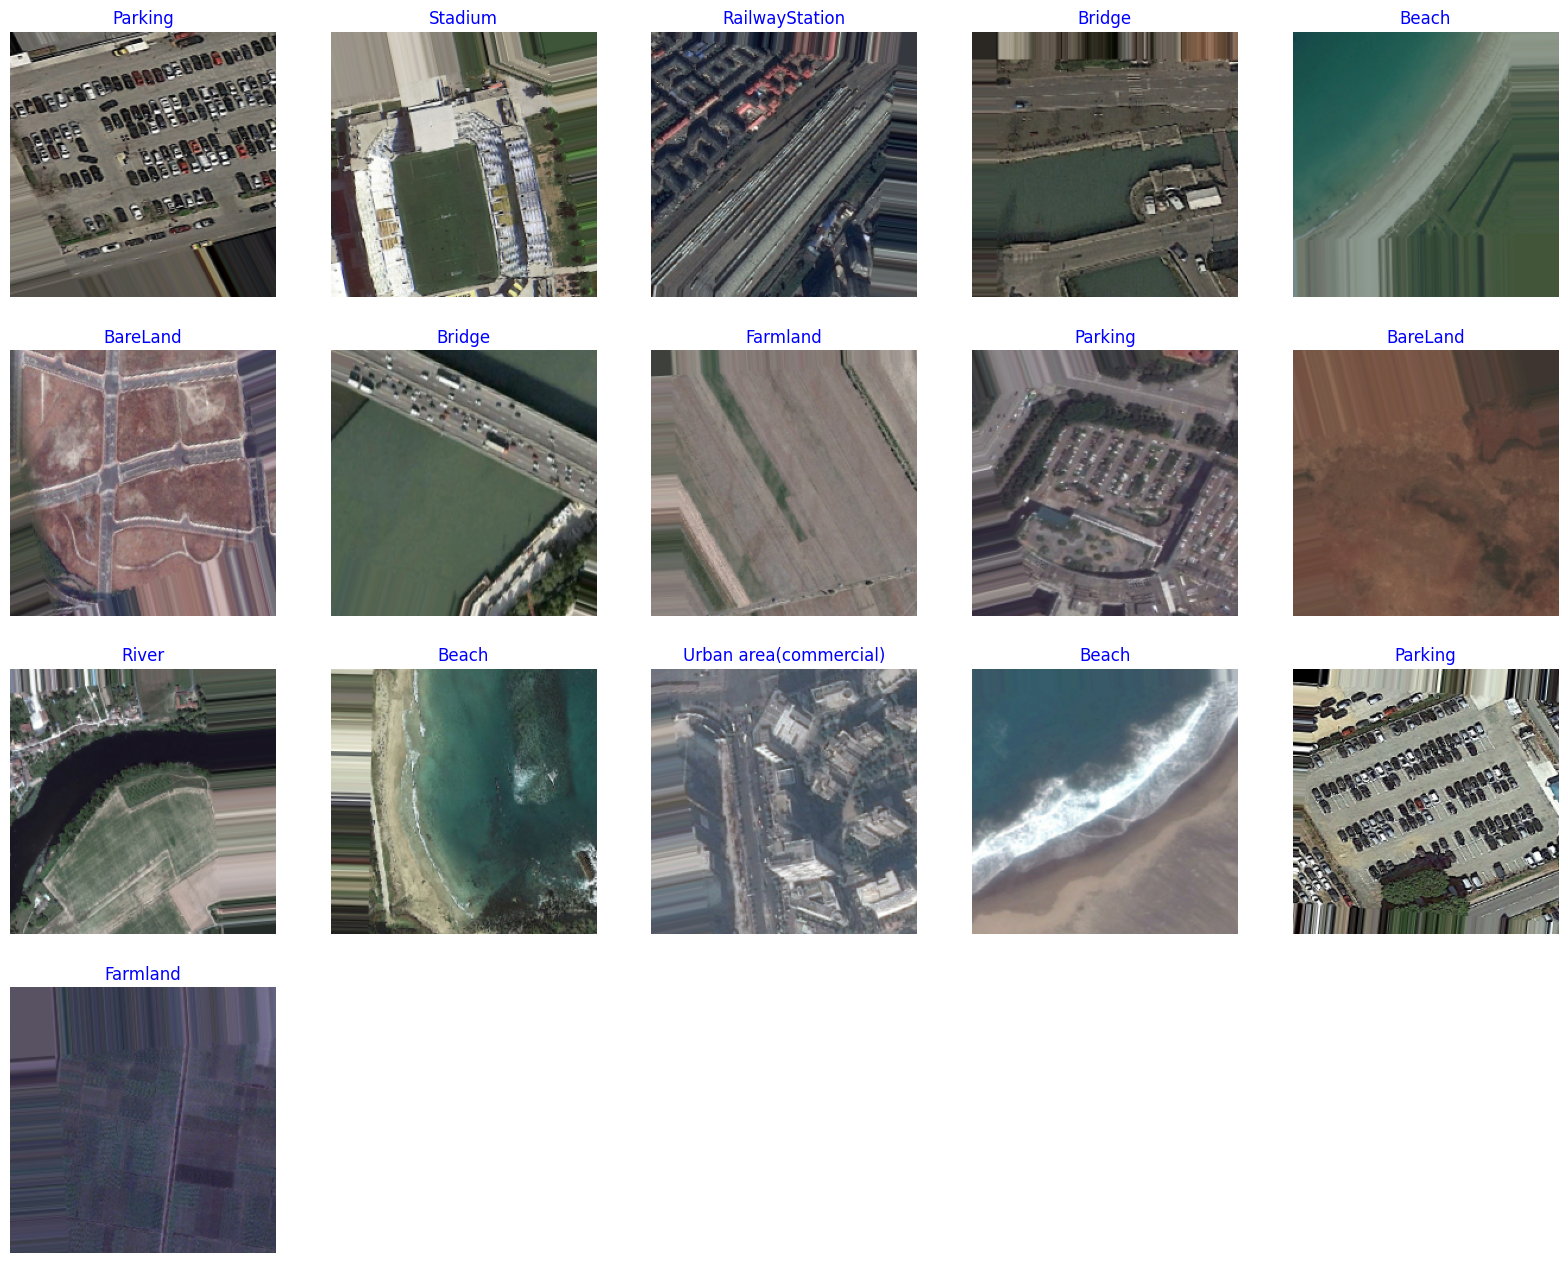

In [9]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()

show_image_samples(train_gen )


In [10]:
# Assuming `train_gen` is your training data generator
classes = list(train_gen.class_indices.keys())  # Get class names
num_classes = len(classes)  # Number of classes

print(f"Number of classes: {num_classes}")
print("Class names:", classes)


Number of classes: 10
Class names: ['BareLand', 'Beach', 'Bridge', 'Farmland', 'Parking', 'RailwayStation', 'River', 'SparseResidential', 'Stadium', 'Urban area(commercial)']


c:\Users\chiranth Shri Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2878 - loss: 3.5230Training state saved after epoch 1.
200/200 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.2886 - loss: 3.5200 - val_accuracy: 0.8305 - val_loss: 1.7830 - learning_rate: 1.0000e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7145 - loss: 2.0759Training state saved after epoch 2.
200/200 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7146 - loss: 2.0756 - val_accuracy: 0.8757 - val_loss: 1.6290 - learning_rate: 1.0000e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7704 - loss: 1.8772Training state saved after epoch 3.
200/200 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.7704 - loss: 1.8770 - val_accuracy: 0.8927 - val_loss: 1.5285 - learning_rate: 1.0000e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8084 - loss: 1.7587Training state saved after epoch 4.
200/200 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.8084 - loss: 1.7586 - val_

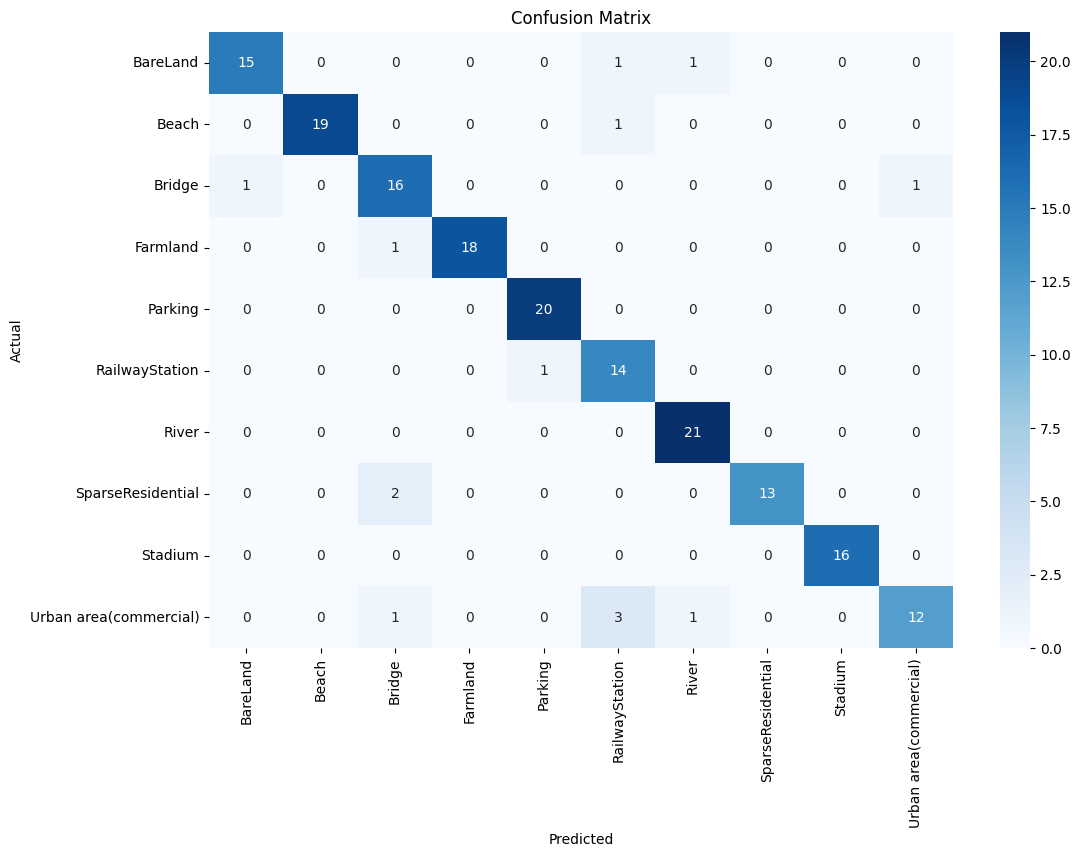

Classification Report:
                         precision    recall  f1-score   support

              BareLand     0.9375    0.8824    0.9091        17
                 Beach     1.0000    0.9500    0.9744        20
                Bridge     0.8000    0.8889    0.8421        18
              Farmland     1.0000    0.9474    0.9730        19
               Parking     0.9524    1.0000    0.9756        20
        RailwayStation     0.7368    0.9333    0.8235        15
                 River     0.9130    1.0000    0.9545        21
     SparseResidential     1.0000    0.8667    0.9286        15
               Stadium     1.0000    1.0000    1.0000        16
Urban area(commercial)     0.9231    0.7059    0.8000        17

              accuracy                         0.9213       178
             macro avg     0.9263    0.9174    0.9181       178
          weighted avg     0.9287    0.9213    0.9215       178



In [12]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LambdaCallback
from tensorflow.keras import regularizers
import pickle
import os

# Define EfficientNetB7 Model
img_shape = (224, 224, 3)
base_model = EfficientNetB7(weights="imagenet", include_top=False, input_shape=img_shape, pooling="max")
base_model.trainable = False  # Freeze base model initially

# Add custom classification layers
x = BatchNormalization()(base_model.output)
x = Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(len(classes), activation="softmax")(x)
start_epoch=0

model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Save model checkpoint after every epoch
checkpoint = ModelCheckpoint(
    "efficientnetb7_checkpoint.weights.h5",  # Save weights to this file
    save_best_only=False,       # Save at each epoch
    save_weights_only=True,     # Save only the weights
    save_freq='epoch'
)

def save_training_state(epoch, logs):
    training_state = {
        'epoch': epoch + 1,  # Save next epoch for resumption
        'optimizer_state': model.optimizer.get_config()
    }
    with open("training_state.pkl", "wb") as f:
        pickle.dump(training_state, f)
    print(f"Training state saved after epoch {epoch + 1}.")

state_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: save_training_state(epoch, logs))

# Ask to continue after every 15 epochs
def ask_to_continue(epoch, logs):
    if (epoch + 1) % 15 == 0:
        response = input(f"Training completed for epoch {epoch + 1}. Do you want to continue? (y/n): ").strip().lower()
        if response != 'y':
            print("Stopping training as per user input.")
            model.stop_training = True

ask_callback = LambdaCallback(on_epoch_end=ask_to_continue)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Training
epochs = 50
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=start_epoch
)

# Fine-Tuning: Unfreeze some layers of the base model and retrain
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze earlier layers
    layer.trainable = False

# Compile the model again after unfreezing
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-Tune the Model
fine_tune_epochs = 20
history_fine_tune = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=fine_tune_epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=history.epoch[-1],
)

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def predictor(test_gen, test_steps):
    y_pred = []
    y_true = test_gen.labels
    classes = list(train_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0

    # Predict on the test set
    preds = model.predict(test_gen, steps=test_steps, verbose=1)
    tests = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        true_index = y_true[i]
        if pred_index != true_index:
            errors += 1
        y_pred.append(pred_index)

    # Calculate accuracy
    acc = (1 - errors / tests) * 100
    print(f'There were {errors} errors in {tests} tests, for an accuracy of {acc:.2f}%.')

    # Confusion matrix
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix if class count is small
    if class_count <= 30:
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Classification report
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4)
    print("Classification Report:\n", clr)

    return errors, tests

# Evaluate the Model
errors, tests = predictor(test_gen, test_steps)


In [56]:
model.save("efficientnet_model.keras")
print(model)


<Functional name=functional_4, built=True>


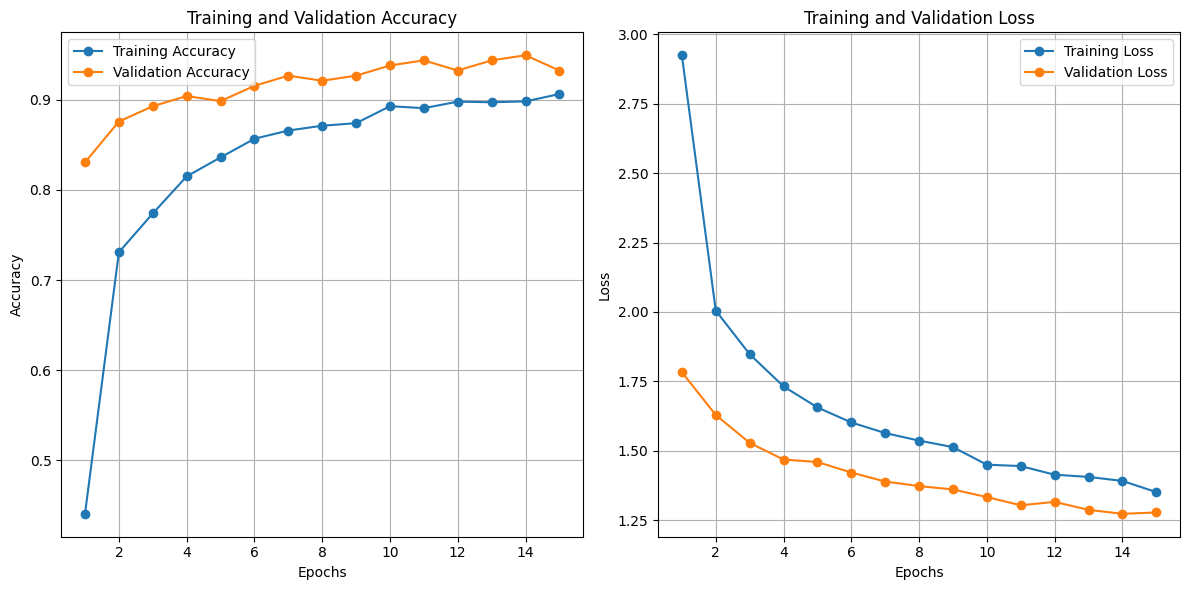

In [20]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs.

    Parameters:
    history: History object from the Keras model training
    """
    # Extract accuracy and loss data
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label="Training Accuracy", marker="o")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label="Training Loss", marker="o")
    plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


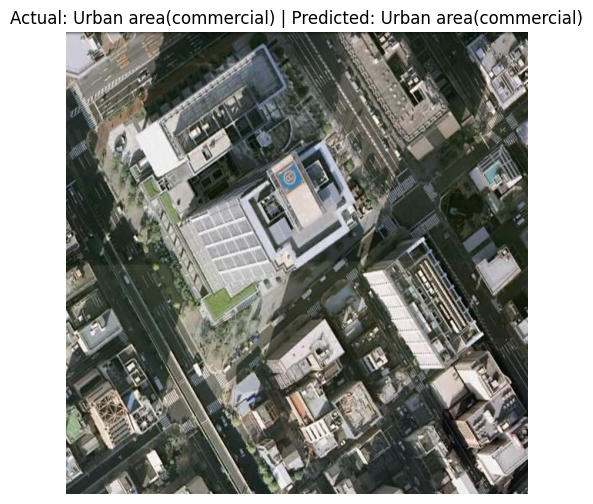

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to make a prediction for a random image from the test set
def predict_random_image(test_gen, model):
    # Get a random index from the test generator
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)

    # Get the image path and actual label
    img_path = test_gen.filepaths[random_idx]
    actual_label_idx = test_gen.classes[random_idx]  # Use .classes instead of .labels

    # Get class names sorted by their indices
    class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda item: item[1])]

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # FIXED: Ensure correct input size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)  # Get the index of the class with the highest probability

    # Get the predicted and actual class names
    predicted_class_name = class_names[predicted_class_idx]
    actual_class_name = class_names[actual_label_idx]

    # Display the image and the prediction results
    plt.figure(figsize=(6,6))
    plt.imshow(image.load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | Predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

# Call the function to predict a random image from the test generator
predict_random_image(test_gen, model)


In [21]:
pip install opencv-python


     ---------------------------------------- 39.5/39.5 MB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


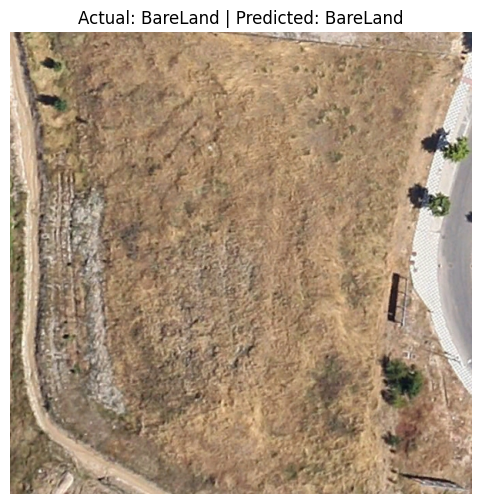


Processing Image: E:\Major project 7th sem\classification\modified AID 8th sem\BareLand\bareland_141.jpg
Generated Caption: an aerial view of a road and a road
Green Area Percentage: 0.54%



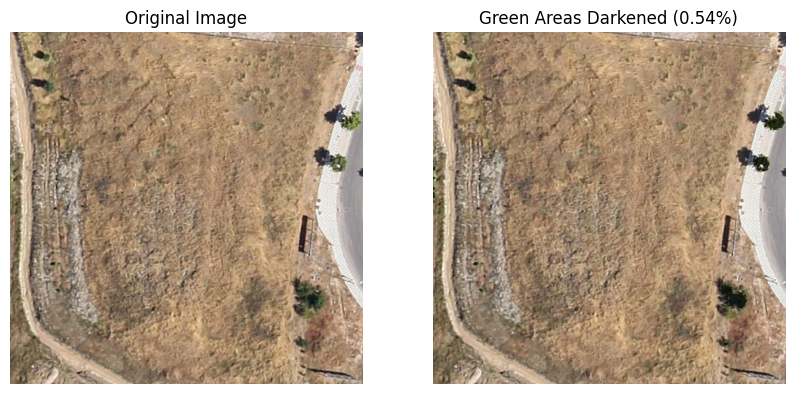

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from tensorflow.keras.preprocessing import image
from transformers import BlipProcessor, BlipForConditionalGeneration
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load BLIP model and processor for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def predict_random_image(test_gen, model):
    """Predicts a random image from the test set and returns the image path, actual label, and predicted label."""
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)
    img_path = test_gen.filepaths[random_idx]
    actual_label_idx = test_gen.classes[random_idx]

    # Get class names sorted by their indices
    class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda item: item[1])]

    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)

    predicted_class_name = class_names[predicted_class_idx]
    actual_class_name = class_names[actual_label_idx]

    # Display the image and predictions
    plt.figure(figsize=(6,6))
    plt.imshow(load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | Predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

    return img_path, predicted_class_name  # Return image path for further processing

def generate_caption(img_path):
    """Generates a caption for the given image using BLIP."""
    raw_image = load_img(img_path, target_size=(224, 224))
    inputs = processor(images=raw_image, return_tensors="pt")
    
    with torch.no_grad():
        caption_ids = blip_model.generate(**inputs)
    caption = processor.batch_decode(caption_ids, skip_special_tokens=True)[0]
    return caption

def segment_green_area(img_path):
    """Darkens the green areas in an image and calculates their percentage."""
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(img_hsv, lower_green, upper_green)

    darkened = img.copy()
    darkened[mask > 0] = darkened[mask > 0] * 0.3  # Darken green areas

    total_pixels = img.shape[0] * img.shape[1]
    green_pixels = np.count_nonzero(mask)
    green_percentage = (green_pixels / total_pixels) * 100

    return darkened, green_percentage

def process_image(img_path):
    """Processes the given image by generating a caption and darkening the green area."""
    caption = generate_caption(img_path)
    darkened_img, green_percentage = segment_green_area(img_path)

    print(f"\nProcessing Image: {img_path}")
    print(f"Generated Caption: {caption}")
    print(f"Green Area Percentage: {green_percentage:.2f}%\n")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(load_img(img_path))
    plt.title("Original Image")
    plt.xlabel(caption)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(darkened_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Green Areas Darkened ({green_percentage:.2f}%)")
    plt.axis('off')

    plt.show()

# Run the full pipeline: Prediction -> Captioning -> Green Area Segmentation
img_path, predicted_class = predict_random_image(test_gen, model)
process_image(img_path)  # Pass the predicted image to BLIP and green segmentation


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.2733 - loss: 3.3504Training state saved after epoch 1.
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.2740 - loss: 3.3476 - val_accuracy: 0.7684 - val_loss: 1.7915 - learning_rate: 1.0000e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6861 - loss: 1.9402Training state saved after epoch 2.
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 241ms/step - accuracy: 0.6863 - loss: 1.9396 - val_accuracy: 0.8531 - val_loss: 1.5304 - learning_rate: 1.0000e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7919 - loss: 1.6054Training state saved after epoch 3.
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 243ms/step - accuracy: 0.7920 - loss: 1.6052 - val_accuracy: 0.8418 - val_loss: 1.4504 - learning_rate: 1.0000e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8429 - loss: 1.4653Training state saved after epoch 4.
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 244ms/step - accuracy: 0.8429 -

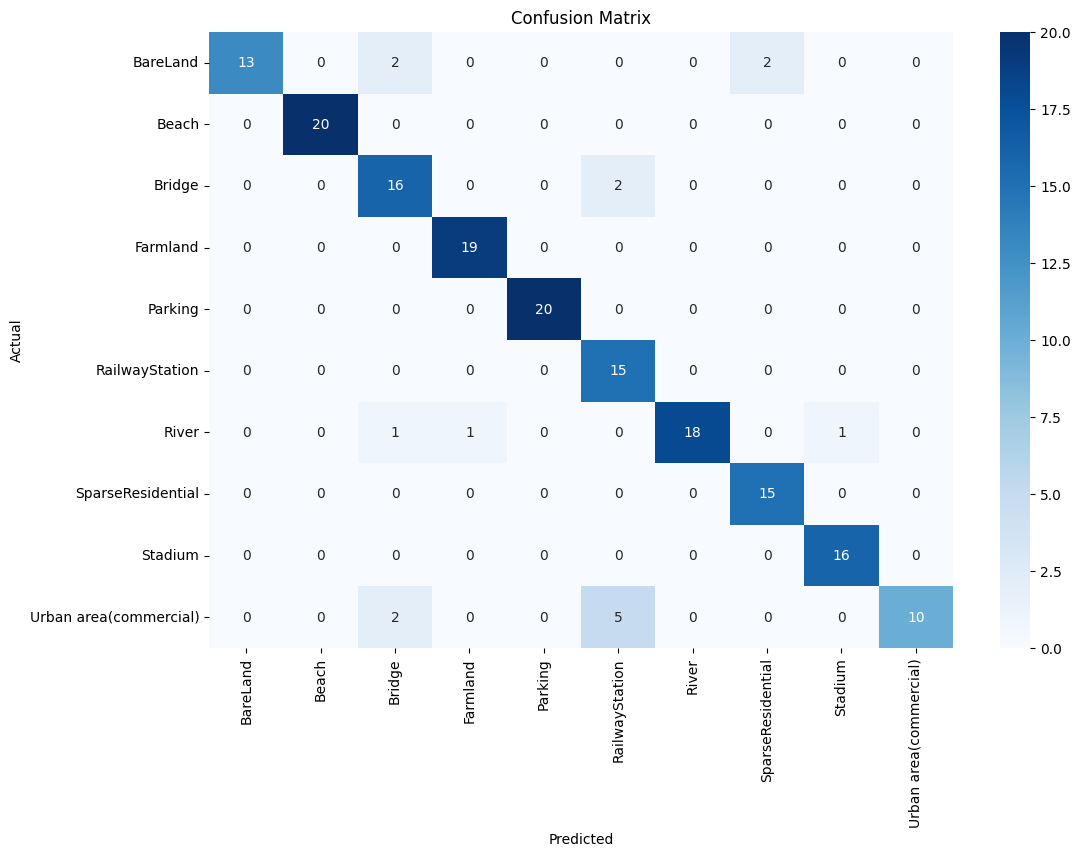

Classification Report:
                         precision    recall  f1-score   support

              BareLand     1.0000    0.7647    0.8667        17
                 Beach     1.0000    1.0000    1.0000        20
                Bridge     0.7619    0.8889    0.8205        18
              Farmland     0.9500    1.0000    0.9744        19
               Parking     1.0000    1.0000    1.0000        20
        RailwayStation     0.6818    1.0000    0.8108        15
                 River     1.0000    0.8571    0.9231        21
     SparseResidential     0.8824    1.0000    0.9375        15
               Stadium     0.9412    1.0000    0.9697        16
Urban area(commercial)     1.0000    0.5882    0.7407        17

              accuracy                         0.9101       178
             macro avg     0.9217    0.9099    0.9043       178
          weighted avg     0.9286    0.9101    0.9086       178



In [29]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LambdaCallback
from tensorflow.keras import regularizers
import pickle
import os

# Define MobileNetV3-Large Model
img_shape = (224, 224, 3)
base_model = MobileNetV3Large(weights="imagenet", include_top=False, input_shape=img_shape, pooling="max")
base_model.trainable = False  # Freeze base model initially

# Add custom classification layers
x = BatchNormalization()(base_model.output)
x = Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(len(classes), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Save model checkpoint after every epoch
checkpoint = ModelCheckpoint(
    "mobilenetv3_checkpoint.weights.h5",  # Save weights to this file
    save_best_only=False,       # Save at each epoch
    save_weights_only=True,     # Save only the weights
    save_freq='epoch'
)

def save_training_state(epoch, logs):
    training_state = {
        'epoch': epoch + 1,  # Save next epoch for resumption
        'optimizer_state': model.optimizer.get_config()
    }
    with open("training_state.pkl", "wb") as f:
        pickle.dump(training_state, f)
    print(f"Training state saved after epoch {epoch + 1}.")

state_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: save_training_state(epoch, logs))

# Ask to continue after every 10 epochs
def ask_to_continue(epoch, logs):
    if (epoch + 1) % 15 == 0:  # Ask after every 10 epochs
        response = input(f"Training completed for epoch {epoch + 1}. Do you want to continue? (y/n): ").strip().lower()
        if response != 'y':
            print("Stopping training as per user input.")
            model.stop_training = True

ask_callback = LambdaCallback(on_epoch_end=ask_to_continue)



# Callbacks
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Training
epochs = 50
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=start_epoch
)

# Fine-Tuning: Unfreeze some layers of the base model and retrain
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze earlier layers
    layer.trainable = False

# Compile the model again after unfreezing
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-Tune the Model
fine_tune_epochs = 20
history_fine_tune = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=fine_tune_epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=history.epoch[-1],
)
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def predictor(test_gen, test_steps):
    y_pred = []
    y_true = test_gen.labels
    classes = list(train_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0

    # Predict on the test set
    preds = model.predict(test_gen, steps=test_steps, verbose=1)
    tests = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        true_index = y_true[i]  # Labels are integer values
        if pred_index != true_index:  # A misclassification has occurred
            errors += 1
        y_pred.append(pred_index)

    # Calculate accuracy
    acc = (1 - errors / tests) * 100
    print(f'There were {errors} errors in {tests} tests, for an accuracy of {acc:.2f}%.')

    # Confusion matrix
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix if class count is small
    if class_count <= 30:
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Classification report
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4)
    print("Classification Report:\n", clr)

    return errors, tests


# Evaluate the Model
errors, tests = predictor(test_gen, test_steps)


In [55]:
model.save("efficientnet_model.keras")

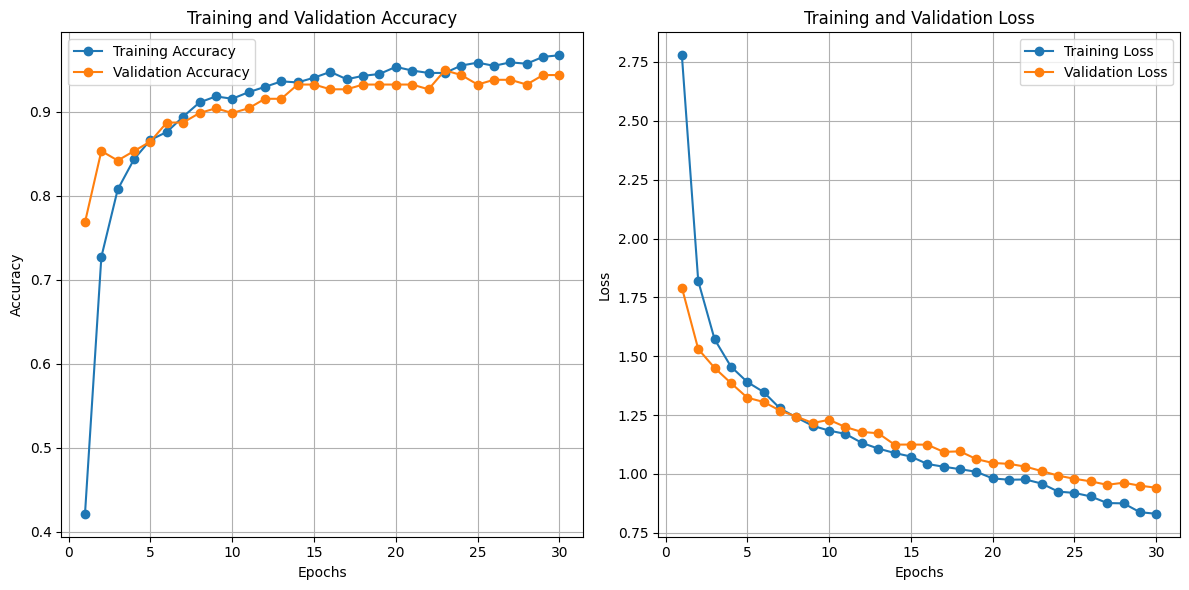

In [32]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs.

    Parameters:
    history: History object from the Keras model training
    """
    # Extract accuracy and loss data
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label="Training Accuracy", marker="o")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label="Training Loss", marker="o")
    plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


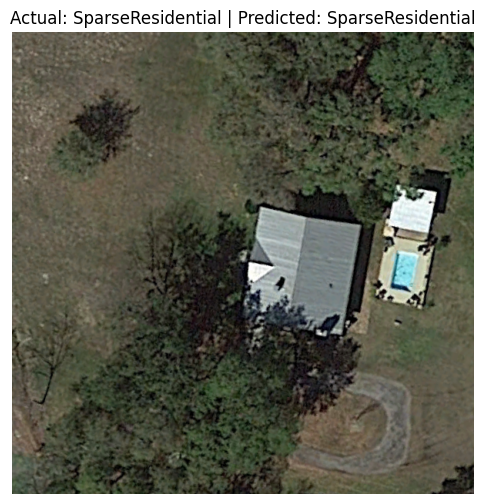

In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to make a prediction for a random image from the test set
def predict_random_image(test_gen, model):
    # Get a random index from the test generator
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)

    # Get the image path and actual label
    img_path = test_gen.filepaths[random_idx]
    actual_label_idx = test_gen.classes[random_idx]  # Use .classes instead of .labels

    # Get class names sorted by their indices
    class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda item: item[1])]

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # FIXED: Ensure correct input size
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)  # Get the index of the class with the highest probability

    # Get the predicted and actual class names
    predicted_class_name = class_names[predicted_class_idx]
    actual_class_name = class_names[actual_label_idx]

    # Display the image and the prediction results
    plt.figure(figsize=(6,6))
    plt.imshow(image.load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | Predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

# Call the function to predict a random image from the test generator
predict_random_image(test_gen, model)


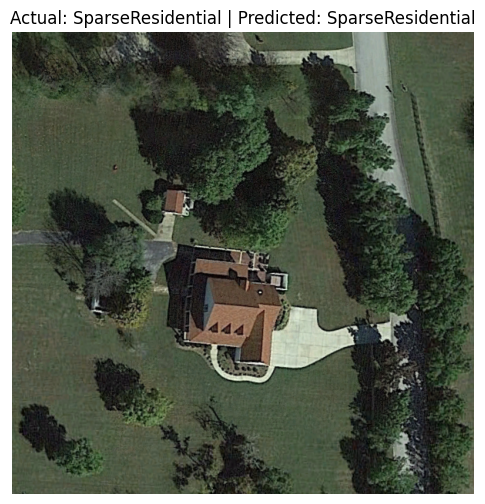


Processing Image: E:\Major project 7th sem\classification\modified AID 8th sem\SparseResidential\sparseresidential_144.jpg
Generated Caption: a house in the middle of a field
Green Area Percentage: 57.50%



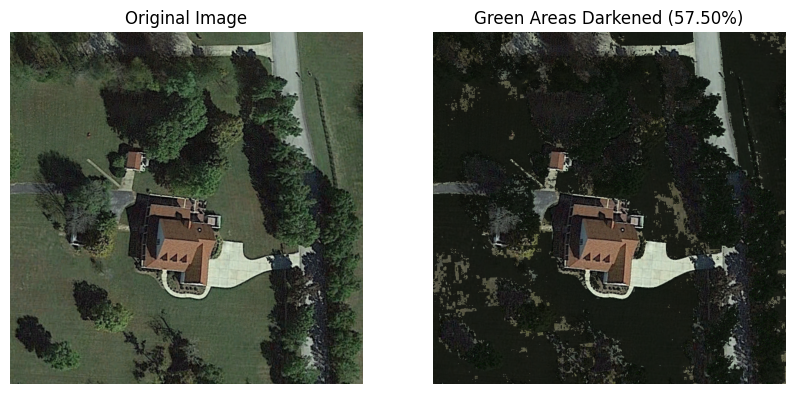

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from tensorflow.keras.preprocessing import image
from transformers import BlipProcessor, BlipForConditionalGeneration
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load BLIP model and processor for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def predict_random_image(test_gen, model):
    """Predicts a random image from the test set and returns the image path, actual label, and predicted label."""
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)
    img_path = test_gen.filepaths[random_idx]
    actual_label_idx = test_gen.classes[random_idx]

    # Get class names sorted by their indices
    class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda item: item[1])]

    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)

    predicted_class_name = class_names[predicted_class_idx]
    actual_class_name = class_names[actual_label_idx]

    # Display the image and predictions
    plt.figure(figsize=(6,6))
    plt.imshow(load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | Predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

    return img_path, predicted_class_name  # Return image path for further processing

def generate_caption(img_path):
    """Generates a caption for the given image using BLIP."""
    raw_image = load_img(img_path, target_size=(224, 224))
    inputs = processor(images=raw_image, return_tensors="pt")
    
    with torch.no_grad():
        caption_ids = blip_model.generate(**inputs)
    caption = processor.batch_decode(caption_ids, skip_special_tokens=True)[0]
    return caption

def segment_green_area(img_path):
    """Darkens the green areas in an image and calculates their percentage."""
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(img_hsv, lower_green, upper_green)

    darkened = img.copy()
    darkened[mask > 0] = darkened[mask > 0] * 0.3  # Darken green areas

    total_pixels = img.shape[0] * img.shape[1]
    green_pixels = np.count_nonzero(mask)
    green_percentage = (green_pixels / total_pixels) * 100

    return darkened, green_percentage

def process_image(img_path):
    """Processes the given image by generating a caption and darkening the green area."""
    caption = generate_caption(img_path)
    darkened_img, green_percentage = segment_green_area(img_path)

    print(f"\nProcessing Image: {img_path}")
    print(f"Generated Caption: {caption}")
    print(f"Green Area Percentage: {green_percentage:.2f}%\n")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(load_img(img_path))
    plt.title("Original Image")
    plt.xlabel(caption)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(darkened_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Green Areas Darkened ({green_percentage:.2f}%)")
    plt.axis('off')

    plt.show()

# Run the full pipeline: Prediction -> Captioning -> Green Area Segmentation
img_path, predicted_class = predict_random_image(test_gen, model)
process_image(img_path)  # Pass the predicted image to BLIP and green segmentation


In [ ]:
plt.title(f"Actual: {actual_class_name} | Predicted: {predicted_class_name}")

In [30]:
for layer in base_model.layers[:80]:  # Freeze only the first 80 layers
    layer.trainable = False


In [31]:
output = Dense(len(classes), activation="softmax")(x)


In [32]:
import os
os.remove("senet_checkpoint.weights.h5")


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [37]:
start_epoch = 0

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,778,890 (94.52 MB)

 Trainable params: 1,187,082 (4.53 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

None
Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.3282 - loss: 3.4003Training state saved after epoch 1.
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 627ms/step - accuracy: 0.3291 - loss: 3.3968 - val_accuracy: 0.8870 - val_loss: 1.5136 - learning_rate: 1.0000e-04
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.7802 - loss: 1.8228Training state saved after epoch 2.
200/200 ━━━━━━━━━━━━━━━━━━━━ 124s 617ms/step - accuracy: 0.7802 - loss: 1.8225 - val_accuracy: 0.8983 - val_loss: 1.4200 - learning_rate: 1.0000e-04
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.8387 - loss: 1.6293Training state saved after epoch 3.
200/200 ━━━━━━━━━━━━━━━━━━━━ 123s 612ms/step - accuracy: 0.8387 - loss: 1.6292 - val_accuracy: 0.9322 - val_loss: 1.3306 - learning_rate: 1.0000e-04
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8650 - loss: 1.5499Training state saved after epoch 4.
200/200 ━━━━━━━━━━━━━━━━━━━━ 122s 611ms/step - accuracy:

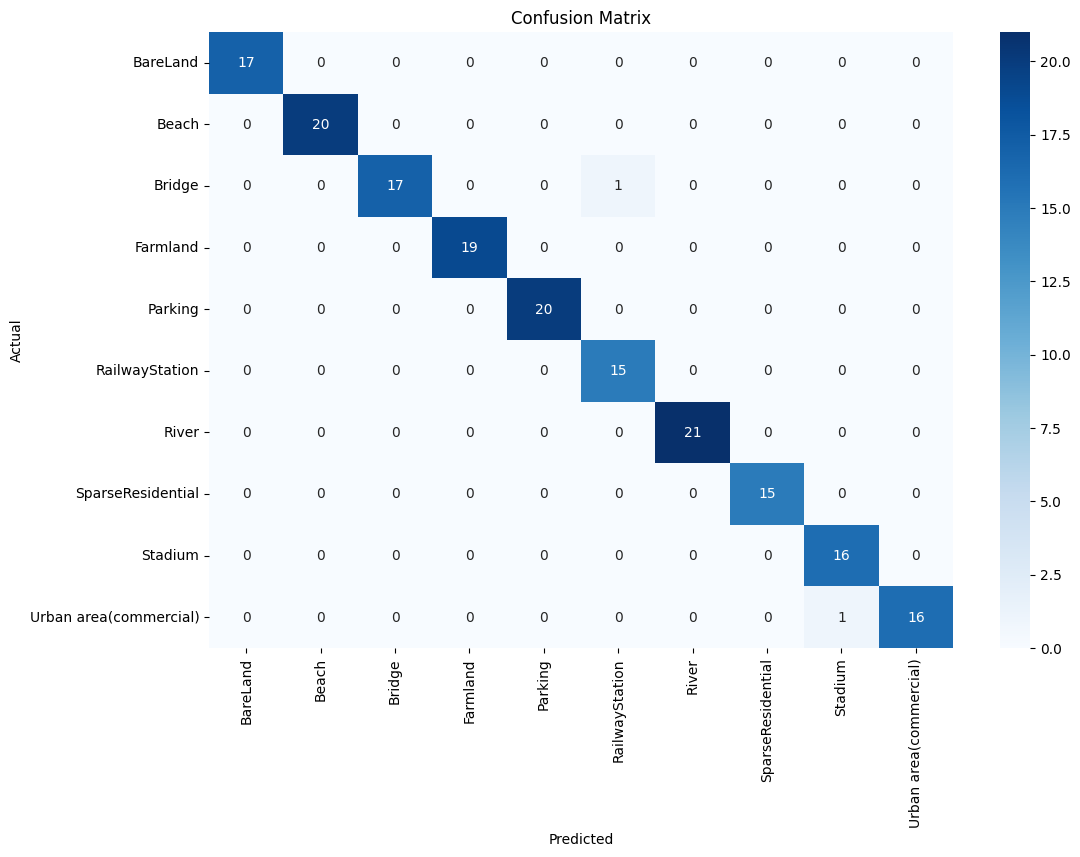

Classification Report:
                         precision    recall  f1-score   support

              BareLand     1.0000    1.0000    1.0000        17
                 Beach     1.0000    1.0000    1.0000        20
                Bridge     1.0000    0.9444    0.9714        18
              Farmland     1.0000    1.0000    1.0000        19
               Parking     1.0000    1.0000    1.0000        20
        RailwayStation     0.9375    1.0000    0.9677        15
                 River     1.0000    1.0000    1.0000        21
     SparseResidential     1.0000    1.0000    1.0000        15
               Stadium     0.9412    1.0000    0.9697        16
Urban area(commercial)     1.0000    0.9412    0.9697        17

              accuracy                         0.9888       178
             macro avg     0.9879    0.9886    0.9879       178
          weighted avg     0.9894    0.9888    0.9888       178



In [39]:
from tensorflow.keras.applications import ResNet50  # Use a ResNet variant with SE blocks if SE-Net is unavailable
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LambdaCallback
from tensorflow.keras import regularizers
import pickle
import os
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define SE-Net Model (use a ResNet variant if SE-Net is not directly available)
img_shape = (224, 224, 3)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=img_shape, pooling="max")
base_model.trainable = False  # Freeze base model initially

# Add custom classification layers
x = BatchNormalization()(base_model.output)
x = Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.3)(x)
output = Dense(len(classes), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)
print(model.summary())


# Compile the Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Save model checkpoint after every epoch
checkpoint = ModelCheckpoint(
    "senet_checkpoint.weights.h5",  # Save weights to this file
    save_best_only=False,           # Save at each epoch
    save_weights_only=True,         # Save only the weights
    save_freq='epoch'
)

def save_training_state(epoch, logs):
    training_state = {
        'epoch': epoch + 1,  # Save next epoch for resumption
        'optimizer_state': model.optimizer.get_config()
    }
    with open("training_state.pkl", "wb") as f:
        pickle.dump(training_state, f)
    print(f"Training state saved after epoch {epoch + 1}.")

state_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: save_training_state(epoch, logs))

# Ask to continue after every 10 epochs
def ask_to_continue(epoch, logs):
    if (epoch + 1) % 10 == 0:  # Ask after every 10 epochs
        response = input(f"Training completed for epoch {epoch + 1}. Do you want to continue? (y/n): ").strip().lower()
        if response != 'y':
            print("Stopping training as per user input.")
            model.stop_training = True

ask_callback = LambdaCallback(on_epoch_end=ask_to_continue)

# Check for existing checkpoint
start_epoch = 0


# Callbacks
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Training
epochs = 40
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=start_epoch
)

# Fine-Tuning: Unfreeze some layers of the base model and retrain
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze earlier layers
    layer.trainable = False

# Compile the model again after unfreezing
model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-Tune the Model
fine_tune_epochs = 20
history_fine_tune = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=fine_tune_epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint, state_callback, ask_callback],
    verbose=1,
    initial_epoch=history.epoch[-1],
)

# Evaluate the Model
def predictor(test_gen, test_steps):
    y_pred = []
    y_true = test_gen.labels
    classes = list(train_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0

    # Predict on the test set
    preds = model.predict(test_gen, steps=test_steps, verbose=1)
    tests = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        true_index = y_true[i]  # Labels are integer values
        if pred_index != true_index:  # A misclassification has occurred
            errors += 1
        y_pred.append(pred_index)

    # Calculate accuracy
    acc = (1 - errors / tests) * 100
    print(f'There were {errors} errors in {tests} tests, for an accuracy of {acc:.2f}%.')

    # Confusion matrix
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix if class count is small
    if class_count <= 30:
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Classification report
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4)
    print("Classification Report:\n", clr)

    return errors, tests

errors, tests = predictor(test_gen, test_steps)


In [40]:
model.save("resnet_model.h5")

In [54]:
model.save("resnet_model.keras")


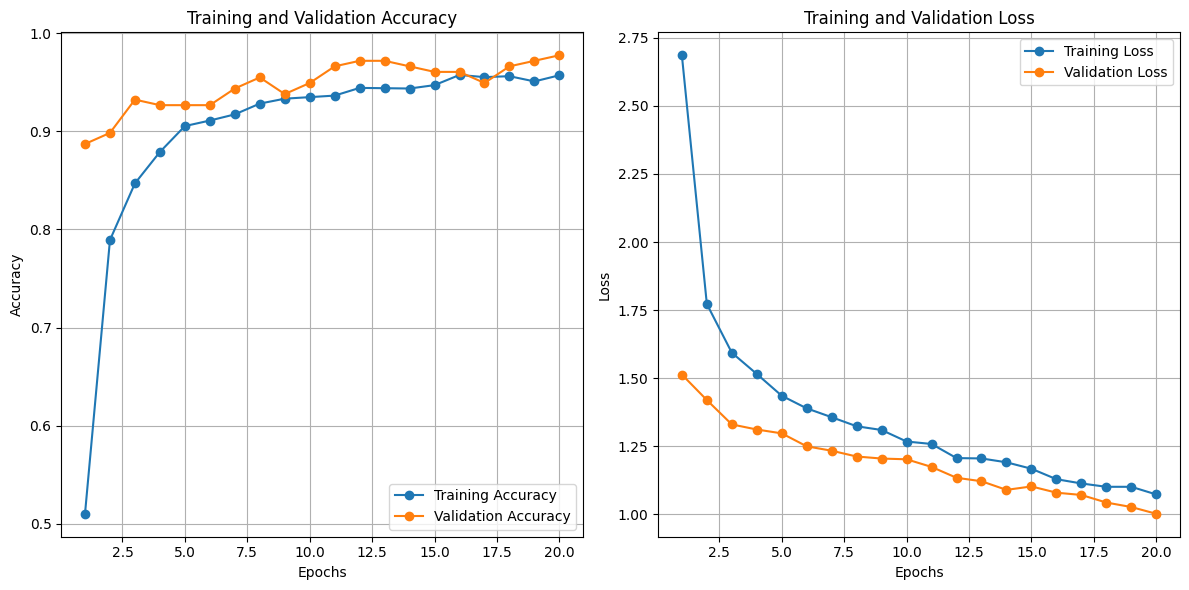

In [47]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs.

    Parameters:
    history: History object from the Keras model training
    """
    # Extract accuracy and loss data
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(train_acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label="Training Accuracy", marker="o")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label="Training Loss", marker="o")
    plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


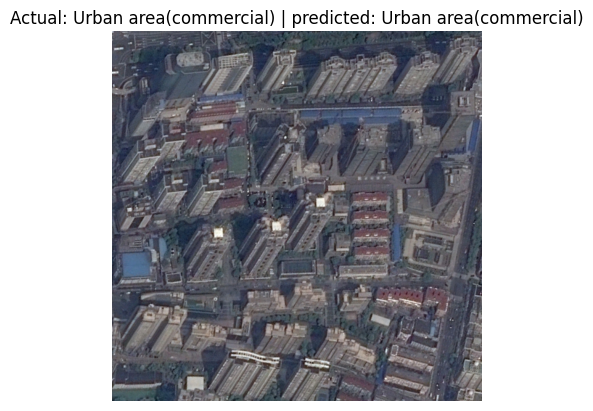

In [42]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to make a prediction for a random image from the test set
def predict_random_image(test_gen):
    # Get a random index from the test generator
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)

    # Get the image path and actual label
    img_path = test_gen.filepaths[random_idx]
    actual_label = test_gen.labels[random_idx]

    # Get class names from the generator
    class_names = list(test_gen.class_indices.keys())

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)  # Get the index of the class with the highest probability

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_idx]

    # Get the actual class name
    actual_class_name = class_names[actual_label]

    # Display the image and the actual and predicted class names
    plt.imshow(image.load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

# Call the function to predict a random image from the test generator
predict_random_image(test_gen)


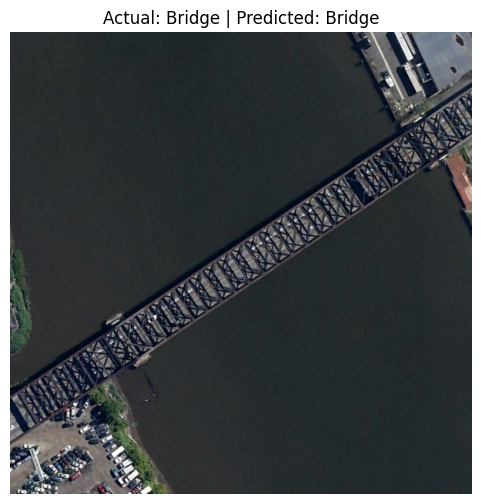


Processing Image: E:\Major project 7th sem\classification\modified AID 8th sem\Bridge\bridge_330.jpg
Generated Caption: a bridge over a river
Green Area Percentage: 1.76%



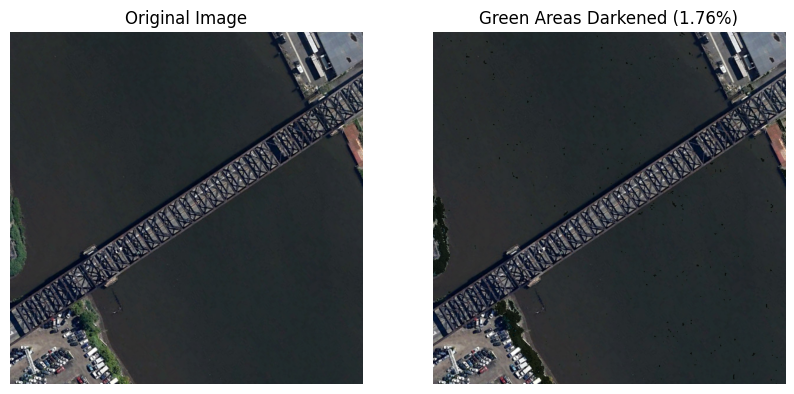

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from tensorflow.keras.preprocessing import image
from transformers import BlipProcessor, BlipForConditionalGeneration
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load BLIP model and processor for caption generation
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def predict_random_image(test_gen, model):
    """Predicts a random image from the test set and returns the image path, actual label, and predicted label."""
    random_idx = random.randint(0, len(test_gen.filepaths) - 1)
    img_path = test_gen.filepaths[random_idx]
    actual_label_idx = test_gen.classes[random_idx]

    # Get class names sorted by their indices
    class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda item: item[1])]

    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(prediction)

    predicted_class_name = class_names[predicted_class_idx]
    actual_class_name = class_names[actual_label_idx]

    # Display the image and predictions
    plt.figure(figsize=(6,6))
    plt.imshow(load_img(img_path))
    plt.title(f"Actual: {actual_class_name} | Predicted: {actual_class_name}")
    plt.axis('off')
    plt.show()

    return img_path, predicted_class_name  # Return image path for further processing

def generate_caption(img_path):
    """Generates a caption for the given image using BLIP."""
    raw_image = load_img(img_path, target_size=(224, 224))
    inputs = processor(images=raw_image, return_tensors="pt")
    
    with torch.no_grad():
        caption_ids = blip_model.generate(**inputs)
    caption = processor.batch_decode(caption_ids, skip_special_tokens=True)[0]
    return caption

def segment_green_area(img_path):
    """Darkens the green areas in an image and calculates their percentage."""
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(img_hsv, lower_green, upper_green)

    darkened = img.copy()
    darkened[mask > 0] = darkened[mask > 0] * 0.3  # Darken green areas

    total_pixels = img.shape[0] * img.shape[1]
    green_pixels = np.count_nonzero(mask)
    green_percentage = (green_pixels / total_pixels) * 100

    return darkened, green_percentage

def process_image(img_path):
    """Processes the given image by generating a caption and darkening the green area."""
    caption = generate_caption(img_path)
    darkened_img, green_percentage = segment_green_area(img_path)

    print(f"\nProcessing Image: {img_path}")
    print(f"Generated Caption: {caption}")
    print(f"Green Area Percentage: {green_percentage:.2f}%\n")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(load_img(img_path))
    plt.title("Original Image")
    plt.xlabel(caption)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(darkened_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Green Areas Darkened ({green_percentage:.2f}%)")
    plt.axis('off')

    plt.show()

# Run the full pipeline: Prediction -> Captioning -> Green Area Segmentation
img_path, predicted_class = predict_random_image(test_gen, model)
process_image(img_path)  # Pass the predicted image to BLIP and green segmentation


In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [57]:
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Load Training Histories
with open("history_mobilenet.pkl", "rb") as f:
    history_mobilenet = pickle.load(f)

with open("history_efficientnet.pkl", "rb") as f:
    history_efficientnet = pickle.load(f)

with open("history_resnet.pkl", "rb") as f:
    history_resnet = pickle.load(f)

# Function to plot accuracy and loss
def plot_training_history(histories, model_names):
    plt.figure(figsize=(12, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history["accuracy"], label=f"{name} Train Acc")
        plt.plot(history["val_accuracy"], linestyle="dashed", label=f"{name} Val Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.legend()
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history["loss"], label=f"{name} Train Loss")
        plt.plot(history["val_loss"], linestyle="dashed", label=f"{name} Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Loss Comparison")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Load Models
mobilenet_model = load_model("mobilenet_model.keras")
efficientnet_model = load_model("efficientnet_model.keras")
resnet_model = load_model("resnet_model.keras")

# Evaluate Models on Test Data
def evaluate_model(model, test_gen, model_name):
    start_time = time.time()
    loss, accuracy = model.evaluate(test_gen, verbose=0)
    inference_time = time.time() - start_time
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Loss = {loss:.4f}, Inference Time = {inference_time:.4f} sec")
    return accuracy, loss, inference_time

# Compare Models
mobilenet_results = evaluate_model(mobilenet_model, test_gen, "MobileNetV3")
efficientnet_results = evaluate_model(efficientnet_model, test_gen, "EfficientNetB7")
resnet_results = evaluate_model(resnet_model, test_gen, "ResNet50")

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_gen, model_name):
    y_true = test_gen.labels
    y_pred = np.argmax(model.predict(test_gen, verbose=0), axis=1)
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

# Display Confusion Matrix and Report for Each Model
plot_confusion_matrix(mobilenet_model, test_gen, "MobileNetV3")
plot_confusion_matrix(efficientnet_model, test_gen, "EfficientNetB7")
plot_confusion_matrix(resnet_model, test_gen, "ResNet50")

# Plot Training History
plot_training_history(
    [history_mobilenet, history_efficientnet, history_resnet],
    ["MobileNetV3", "EfficientNetB7", "ResNet50"]
)


EOFError: Ran out of input

In [58]:
import os

files = ["history_mobilenet.pkl", "history_efficientnet.pkl", "history_resnet.pkl"]
for file in files:
    if os.path.exists(file):
        print(f"{file} exists, size: {os.path.getsize(file)} bytes")
    else:
        print(f"{file} does not exist!")


history_mobilenet.pkl exists, size: 0 bytes
history_efficientnet.pkl does not exist!
history_resnet.pkl does not exist!
